In [1]:
# Load packages
import pandas as pd
from causalimpact import CausalImpact
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv("https://raw.githubusercontent.com/flyandlure/datasets/master/causal_impact_dataset.csv")
df.head()

,date,clicks,impressions,ctr,position
0,2021-07-04,136,6301,2.16,31.97
1,2021-07-05,264,8697,3.04,27.66
2,2021-07-06,299,9236,3.24,26.38
3,2021-07-07,276,10008,2.76,26.77
4,2021-07-08,283,9725,2.91,25.83


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         28 non-null     object 
 1   clicks       28 non-null     int64  
 2   impressions  28 non-null     int64  
 3   ctr          28 non-null     float64
 4   position     28 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ KB


---
**Observations:** PyCausalImpact requires the dataframe to be in a specific format in order to work, we need to change the date column from the current object data type to a datetime. Then we need to convert the regular dataframe to a date indexed dataframe by passing the date to set_index(). That gives us a dataframe containing our clicks, impressions, ctr, and position for each date, but the date is assigned to the index rather than its own column.

---

In [4]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df.head()

,clicks,impressions,ctr,position
date,,,,
2021-07-04,136,6301,2.16,31.97
2021-07-05,264,8697,3.04,27.66
2021-07-06,299,9236,3.24,26.38
2021-07-07,276,10008,2.76,26.77
2021-07-08,283,9725,2.91,25.83


In [5]:
# Define the pre-period and post-period dates
pre_period = ["2021-07-04", "2021-07-17"]
post_period = ["2021-07-18", "2021-07-31"]

In [6]:
# Fit the CausalImpact model
model = CausalImpact(df["clicks"], pre_period, post_period)

In [7]:
# Examining the model outputs
print(model.summary(output="report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 344.36. By contrast, in the absence of an
intervention, we would have expected an average response of 243.01.
The 95% interval of this counterfactual prediction is [183.53, 297.09].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 101.35 with a 95% interval of
[47.27, 160.83]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 4821.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 3402.13. The 95% interval of this prediction is [2569.42, 4159.25].


The above results are given in terms of absolute numbers. In relative
terms, the respon

In [8]:
print(model.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    344.36             4821.0
Prediction (s.d.)         243.01 (28.97)     3402.13 (405.58)
95% CI                    [183.53, 297.09]   [2569.42, 4159.25]

Absolute effect (s.d.)    101.35 (28.97)     1418.87 (405.58)
95% CI                    [47.27, 160.83]    [661.75, 2251.58]

Relative effect (s.d.)    41.71% (11.92%)    41.71% (11.92%)
95% CI                    [19.45%, 66.18%]   [19.45%, 66.18%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.9%

For more details run the command: print(impact.summary('report'))


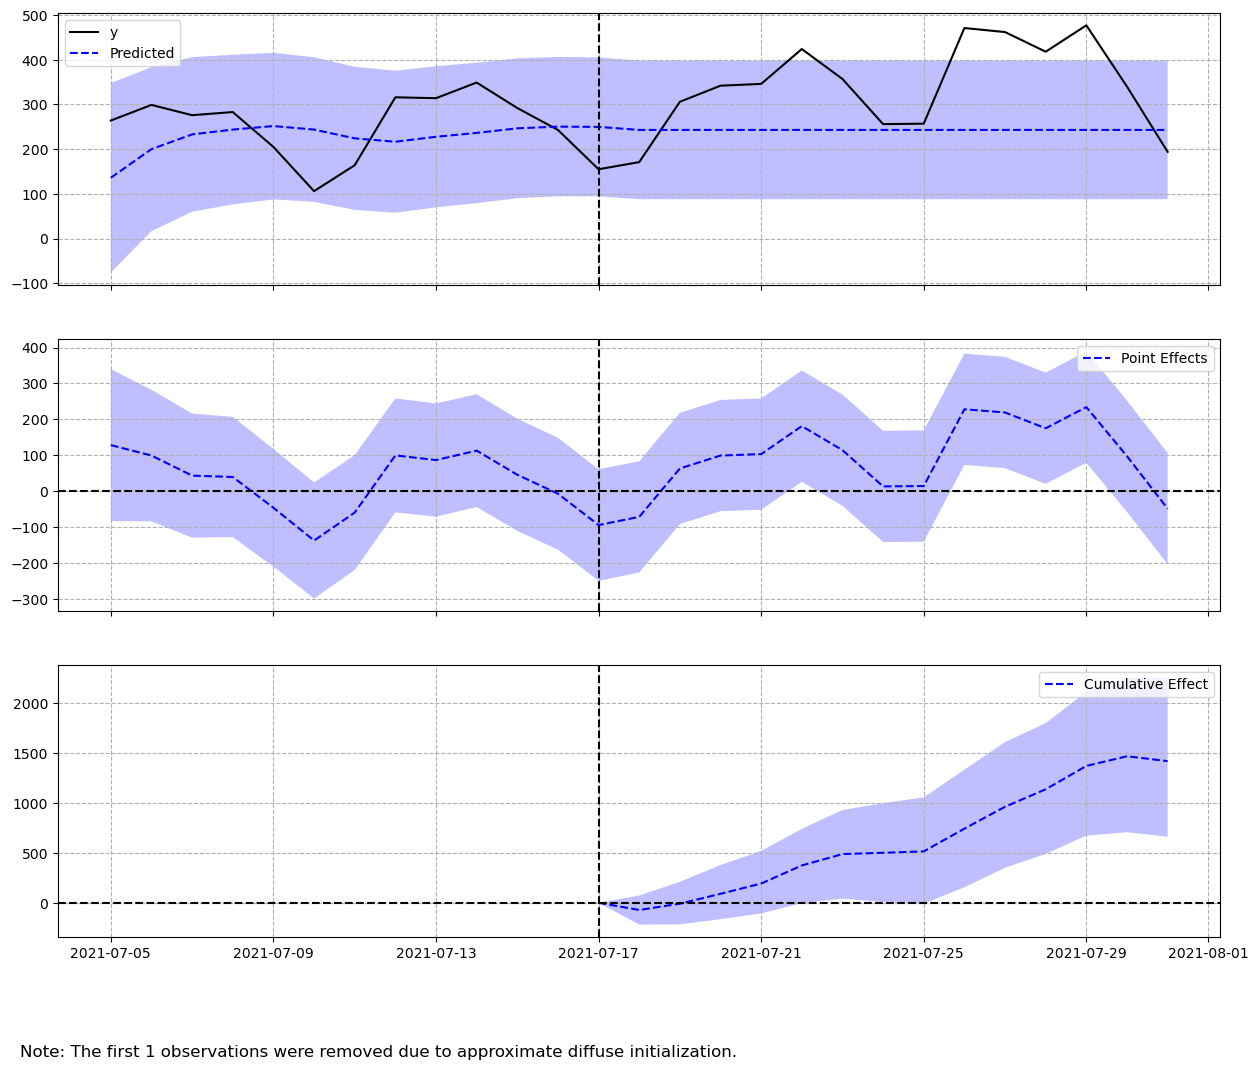

In [9]:
model.plot()

In [10]:
model.inferences.head()

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
date,,,,,,,,,,,,,,,,
2021-07-04,NaN,243.000000,NaN,NaN,NaN,-144088.925913,144574.925913,NaN,NaN,NaN,-107.000000,-144438.925913,144224.925913,NaN,NaN,NaN
2021-07-05,NaN,136.000115,NaN,NaN,NaN,-75.819338,347.819568,NaN,NaN,NaN,127.999885,-83.819568,339.819338,NaN,NaN,NaN
2021-07-06,NaN,200.002087,NaN,NaN,NaN,16.559055,383.445118,NaN,NaN,NaN,98.997913,-84.445118,282.440945,NaN,NaN,NaN
2021-07-07,NaN,233.004926,NaN,NaN,NaN,60.051310,405.958541,NaN,NaN,NaN,42.995074,-129.958541,215.948690,NaN,NaN,NaN
2021-07-08,NaN,243.756117,NaN,NaN,NaN,76.292697,411.219538,NaN,NaN,NaN,39.243883,-128.219538,206.707303,NaN,NaN,NaN


**Observations:** For our dataset, the model predicted that in the absence of intervention we should expect to see an average of 243 clicks in the post-intervention period, but we actually generated 344.

It thus seems reasonable to think that this corresponds to the causal effect the intervention had upon the response variable - the clicks. The site changes made increased clicks by nearly 42%, which was statistically significant and is unlikely to be random (but may, of course, have been caused by something else).